# Demoskript for aggregering og disaggregering av tidsserier


Forfatter: Benedikt Goodman, seksjon 210

email: bgo@ssb.no

Forslag til videre utvikling kan sendes på mail eller teams.

Dette er et demoscript som viser hvordan man bruker funksjonene disagg_func_stairs og aggregation_func til aggregering og disaggregering av tidsserier. Scriptet inneholder også to hjelpefunksjoner, df_generator, som genererer en dataframe med tidsserier, og plotter som lager plots med seaborn.

In [1]:
# Import data utilities
import pandas as pd
import numpy as np

# Import plotters
import matplotlib.pyplot as plt
import seaborn as sns

# Disable userwarnings for dateparsing in df_generator
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Import functions for treatment of timeseries
from ts_agg_disagg import disagg_func_stairs, aggregation_func, plotter

# Helpefunction to generate some sample data
from df_generator import df_generator



In [2]:
# Generate demo dataframes
df_d = df_generator(2, '08-09-2010', '26-06-2020', 'D', null_value_ratio=0.01, insert_null_values=False)
df_m = df_generator(2, '08-09-2010', '26-06-2020', 'M', 0.1, False)
df_q = df_generator(2, '08-09-2010', '26-06-2020', 'Q', 0.1, False)
df_y = df_generator(2, '08-09-2010', '26-06-2020', 'Y', 0.1, False)


# Generate df with datetime index
df_dt = df_generator(2, '08-09-2010', '26-06-2020', 'Q', 0.1, False).reset_index()
df_dt['date'] = df_dt['date'].astype(str)
df_dt.date = pd.to_datetime(df_dt.date)
df_dt = df_dt.set_index('date')

# Proc docstring
df_generator?

Signature:
df_generator(
    n_sectors,
    date_start,
    date_stop,
    frequency,
    null_value_ratio=0.1,
    insert_null_values=False,
)
Docstring:
Generate dataframe indexed by period with n timeseries that have trend
and random noise. Can fill dataframe with a proportion of null values
in random places if insert_null_values = True.

Input arguments are positionally sensitive

Parameters
----------
date_start : string
    First date in generated dataframe. Format YYYY-MM-DD
date_stop : string
    Last date in generated dataframe Format YYYY-MM-DD
frequency : string
    Frequency of dates generated. Day(D), month(M), quarter(Q)
    and year(Y) are valid inputs period
null_value ratio : int
    Decides ratio of null values in dataframe
insert_null_values : bool
    True = null values will be inserted randomly
    False = no null values will be inserted

Returns
-------
df : Dataframe with random data for n time series indexed by date
File:      c:\users\bgo\onedrive - statistisk 

### Et overblikk over noen av dataene

Alle dataframene har data med stigende trend og tilfeldige variasjoner

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 10 entries, 2010 to 2019
Freq: A-DEC
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   industry_0  10 non-null     float64
 1   industry_1  10 non-null     float64
dtypes: float64(2)
memory usage: 240.0 bytes

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 39 entries, 2010Q3 to 2020Q1
Freq: Q-DEC
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   industry_0  39 non-null     float64
 1   industry_1  39 non-null     float64
dtypes: float64(2)
memory usage: 936.0 bytes

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 118 entries, 2010-08 to 2020-05
Freq: M
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   industry_0  118 non-null    float64
 1   industry_1  118 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


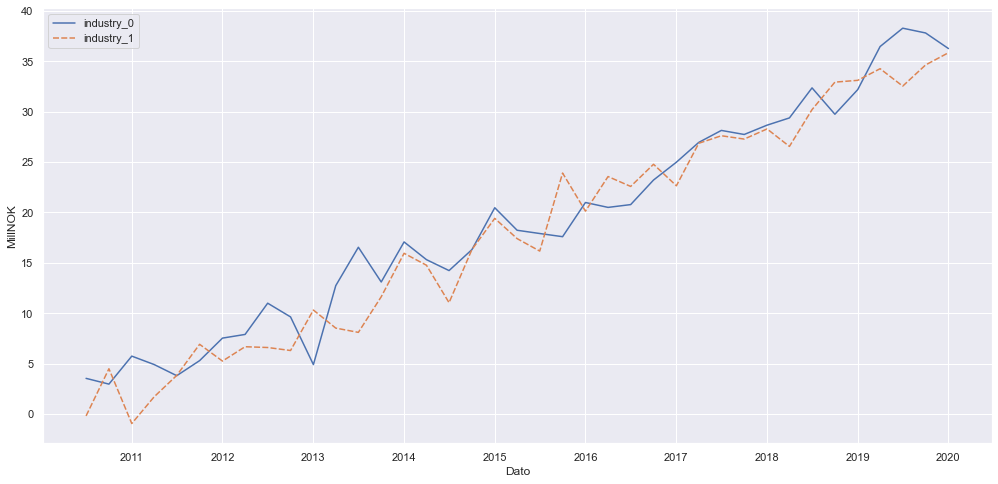

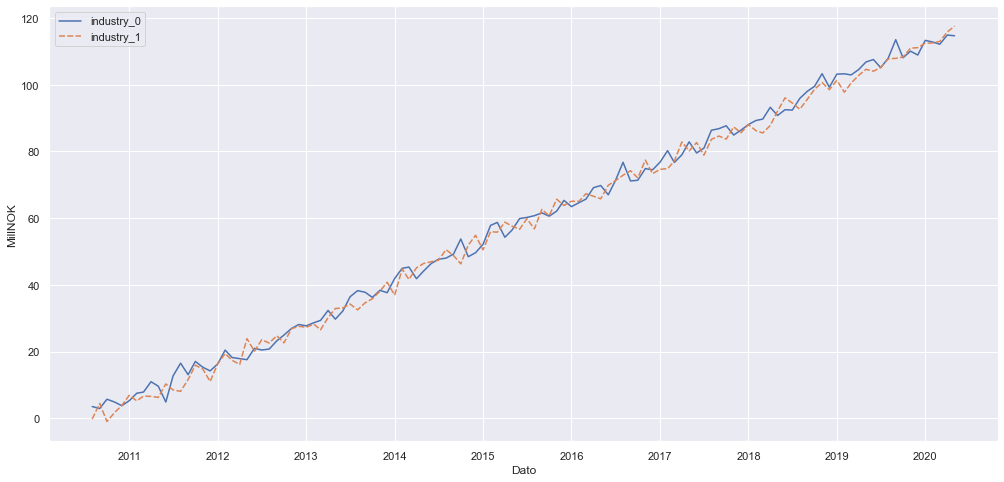

In [3]:
df_y.info()
print()
df_q.info()
print()
df_m.info()

# Plot av kvartalmessige rådata
plotter(df_q)

# Plot av månedlige rådata
plotter(df_m)

### Disaggregering av tidsserier

disagg_func_stairs disaggregerer tidsserier ved å kopiere verdien den observerer innenfor hver input tidsperiode. Det vil si at hvis funksjonen i et kvartal observerer verdien 100 i 2020Q1 så vil januar, februar og mars få verdien 100. Dette sikrer at funksjonen ikke tillegger noen ny informasjon utover den man allerede har i input-tidsserien. Slik sett vil resultatet være avstemt mot det man putter inn i den og likner på CONSTANT disaggregeringen i Fame.

Funksjonen tillater (foreløpig) bare at man går fra måneder til kvartal eller fra kvartal til år. 

Ved å skrive disagg_func_stairs? i en notebook så vil man få opp en docstring med dokumentasjon. 

In [4]:
# Visning av docstring med dokumentasjon
disagg_func_stairs?

Signature: disagg_func_stairs(df, input_freq, output_freq)
Docstring:
Function that returns a disaggregated version of input dataframe.
The disaggregation method applied takes values observed in each
parent time-period and copies it to each of the child time-periods.

Example
    Original data           |timeperiod||value|
                            |  2020Q1  ||1900|
    
    Transformed data       |timeperiod||value|
                           |  2020M1  ||1900|
                           |  2020M2  ||1900|
                           |  2020M3  ||1900|
 
The function can only disaggregate from years to quarters or from
quarters to months.

It requires period-indexes to work.

Parameters
----------
df : dataframe
    Input dataframe to be disaggregated.
input_freq : string
    String specifying periodicity in index of input dataframe.
    Accepts A = annual and Q = quarterly
output_freq : string
   String specifying periodicity in index of output dataframe.
   Accepts A = annual and 

Kjøring av funksjonen gjøres som i blokken under. Her lagres resultatet som en dataframe (fordi funksjonen returnerer en dataframe med disaggregerte tall) og deretter plottes det. Funksjonen er sensitiv for rekkefølgen på inputs. Dataframen man vil disaggregere må først, deretter input frekvens og så output frekvens.

Utsnitt av data før disaggregering:
        industry_0  industry_1
date                          
2010Q3    3.528105   -0.199686
2010Q4    2.957476    4.481786
2011Q1    5.735116   -0.954556
2011Q2    4.900177    1.697286
2011Q3    3.793562    3.821197
2011Q4    5.288087    6.908547
2012Q1    7.522075    5.243350
2012Q2    7.887726    6.667349
2012Q3   10.988158    6.589683
2012Q4    9.626135    6.291809

Utsnitt av disaggregerte data:
         industry_0  industry_1
date                           
2010-07    3.528105   -0.199686
2010-08    3.528105   -0.199686
2010-09    3.528105   -0.199686
2010-10    2.957476    4.481786
2010-11    2.957476    4.481786
2010-12    2.957476    4.481786
2011-01    5.735116   -0.954556
2011-02    5.735116   -0.954556
2011-03    5.735116   -0.954556
2011-04    4.900177    1.697286


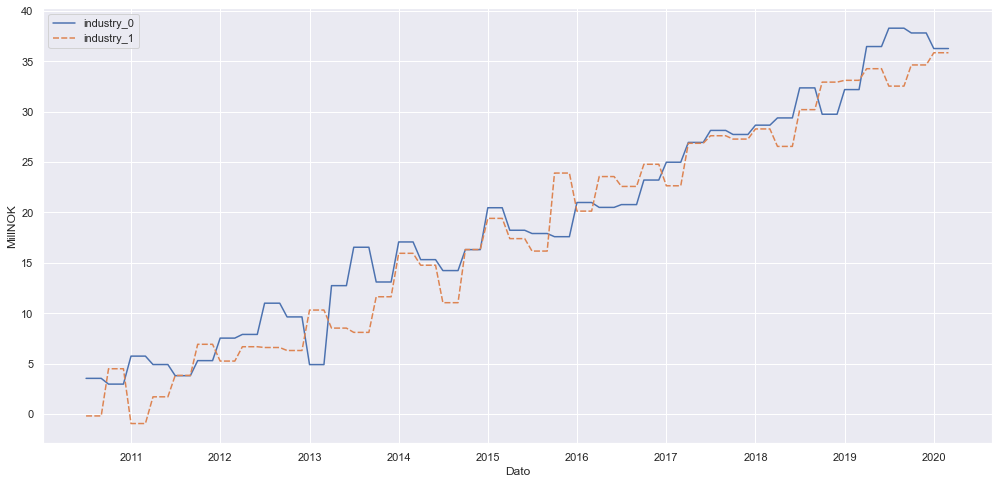

In [5]:
# Disaggregering fra kvartal til måned
months = disagg_func_stairs(df_q, 'Q', 'M')

print('Utsnitt av data før disaggregering:')
print(df_q.head(10))
print()

print('Utsnitt av disaggregerte data:')
print(months.head(10))

# Plotting av resultat
plotter(months)

### Aggregering av tidsserier - en nærmere kikk

Funksjonen aggregation_func likner på aggregeringen som allerede finnes i Fame. Men er noe enklere og har derfor færre funksjonaliteter. Funksjonen i sin nåværende (og kanskje litt primitive) form er i stand til å ta i mot dataframes med en gitt frekvens (alt fra daglig til kvartalmessig er lov) og aggregere dataene opp til ønsket frekvens (måned/kvartal/år).

Aggregeringsoperasjonene denne funksjonen gjengir fra Fame er SUMMED og AVERAGED.

I likehet med funksjonene i Fame setter den hele aggregerte perioder til np.nan (nullverdier) hvis det mangler data fra en periode i kildedatene. Dette gjelder igjennom hele tidsserien og er gjort så funksjonen ikke skal aggregere feil. Dette kan skrus av ved å sette ignore_incomplete=False i funksjonens input

For mer info, sjekk docstringen til funksjonen slik som i neste block.

In [6]:
# Tilhørende docstring med info om inputs, prosess og outputs
aggregation_func?

Signature:
aggregation_func(
    df,
    target_freq,
    aggregation_method,
    ignore_incomplete=True,
)
Docstring:
Aggregation function that outputs mean or sum of input values. Works for
however many sectors you want.

It can only aggregate. I.e. the function will return errors
if desired output periodicity is higher than the input.

The function has two aggregation methods, sum and mean. These
are similar to FAME's SUMMED and AVERAGED aggregation techniques.

sum will take the value of each input period and output the sum of these
within each aggregated group of periods.

mean will output the average across grouped input periods.

Parameters
----------
df : Pandas dataframe.
    Contains data to be resampled.
target_freq : String.
    Desired frequency of output dataframe. Input as string.
        'M' = months
        'Q' = quarter
        'Y' = year
aggregation_method: String.
    Decides aggregation method. Valid inputs are 'mean' or 'sum'.
ignore_incomplete: boolean.
    True 

Argumentet ignore_incomplete styrer om hvorvidt funksjonen skal sette alle verdiene i en periode hvor det finnes manglende data (eller hvor perioden er ukomplett). True skrur denne funksjonen på, mens False skrur den av. I likhet med FAME sin aggregeringsmotor så står den på til vanlig. Dette vil si at man må spesifisere ignore_incomplete=False for å skru den av.

Det er verdt å nevne at spesielt ved bruk av sum og ignore_incomplete=False så vil perioder der det er manglende data bli kunstig lave da funksjonen antar at manglende data = 0. Effekten av dette kan bli stor, spesielt om det er mye manglende data.

Dersom man ikke spesifiserer noe argument for ignore_incomplete så settes den automatisk til True.

In [7]:
df_m = df_generator(2, '08-09-2015', '26-06-2020', 'M', 0.02, True)

# Aggregering fra månedlig til kvartal, gjennomsnitt
quarters_mean = aggregation_func(df_m, 'Q', 'mean')

# Utsnitt av data før og etter aggregering
print('Utsnitt av månedlige data før aggregering')
print(df_m.head(12))

print()
print('Steder med ukomplette perioder')
print(quarters_mean.loc[quarters_mean.isna().any(axis=1)])



Utsnitt av månedlige data før aggregering
         industry_0  industry_1
date                           
2015-08    3.528105   -0.199686
2015-09    2.957476    4.481786
2015-10    5.735116   -0.954556
2015-11    4.900177    1.697286
2015-12    3.793562    3.821197
2016-01    5.288087    6.908547
2016-02    7.522075    5.243350
2016-03    7.887726    6.667349
2016-04   10.988158    6.589683
2016-05    9.626135    6.291809
2016-06    4.894020   10.307237
2016-07   12.728872    8.515670

Steder med ukomplette perioder
        industry_0  industry_1
date                          
2017Q3         NaN   23.634435
2019Q3   48.329186         NaN


Plot av data før aggregering. Denne gangen bruker vi pandas sin innebygde plotter for seaborn (som plotter er bygget på) anslår verdier når den mangler data. Heldigvis blir plottene automatisk i samme stil hvis man har brukt seaborn først og deretter pandas.

<AxesSubplot:xlabel='date'>

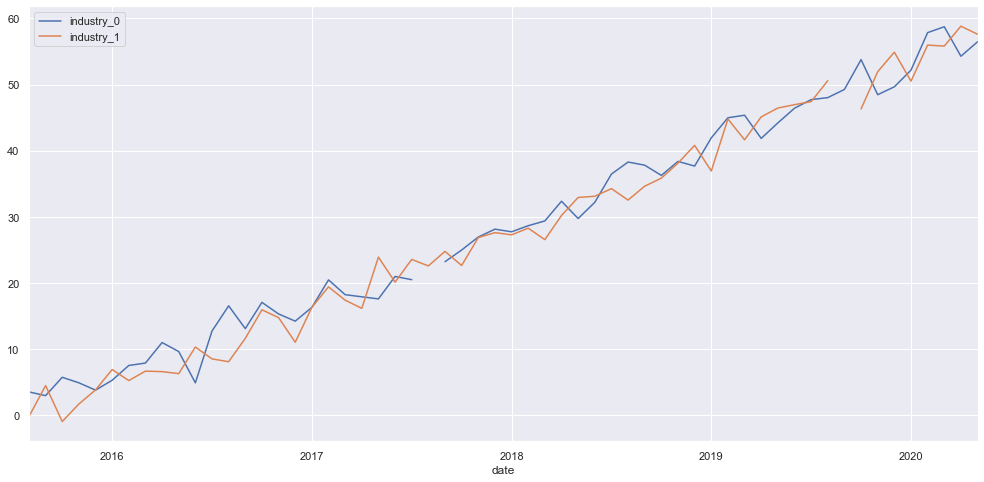

In [8]:
# Plot tudsserier med pandas
df_m.plot()

Plot av aggregerte data på kvartalnivå. Kvartalene hvor data manglet er nå ikke med i den aggregerte tidsserien.

<AxesSubplot:xlabel='date'>

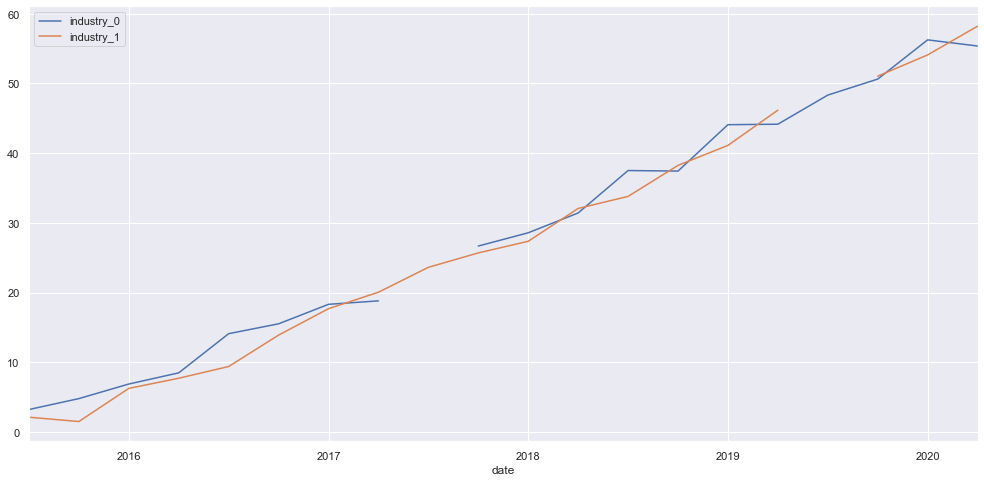

In [9]:
# Plot av resultat med pandas
quarters_mean.plot()

### Eksempel på aggregering uten sletting av perioder der data mangler

Resultatene fra aggregeringsfunksjonen er følsomme for manglende data. Spesielt gjelder dette 'sum' aggregeringen. Dersom data mangler og ignore_incomplete er satt til False så vil aggregeringen produsere kunstig lave aggregerte tall fordi funksjonen antar at manglende data = null når den regner ut aggregert verdi per periode. Et eksempel kan sees i plottet under.

Når manglende data er tilstede i kildedataene og ignore_incomplete=False vil funksjonen gi en advarsel slik at man er klar over at resultatene er påvirket.

Null values present in output dataframe. 
Ensure that output dataframe contains desired output 



<AxesSubplot:xlabel='date'>

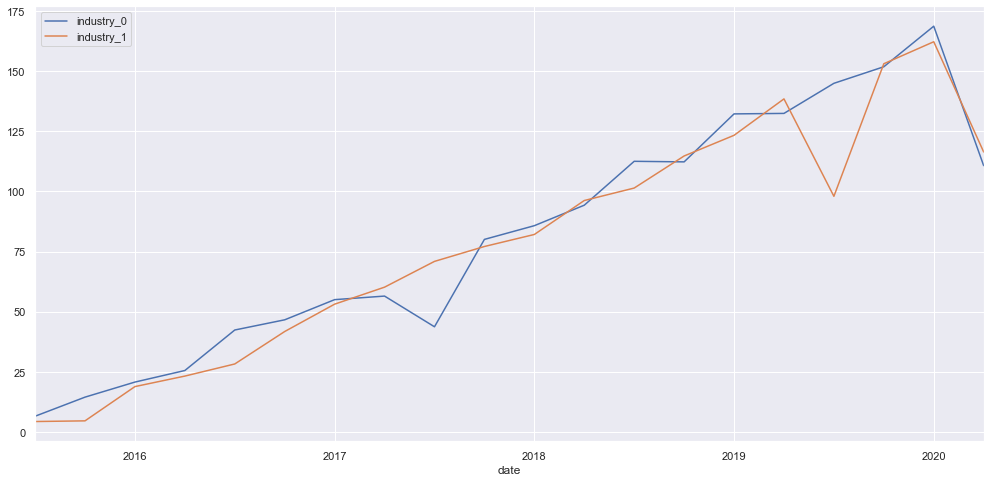

In [10]:
# Aggregering fra måned til kvartal uten sletting
quarters_sum = aggregation_func(df_m, 'Q', 'sum', ignore_incomplete=False)

# Plot av summerte aggregerte verdier
quarters_sum.plot()

Aggregering med gjennomsnitt (mean) er ikke like sensitivt 

Null values present in output dataframe. 
Ensure that output dataframe contains desired output 



<AxesSubplot:xlabel='date'>

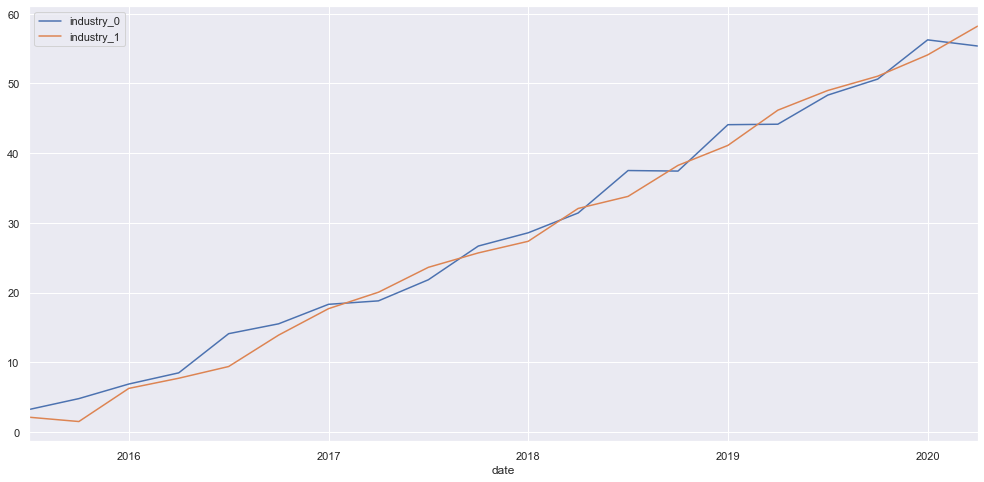

In [11]:
# Aggregering fra måned til kvartal uten sletting
quarters_mean = aggregation_func(df_m, 'Q', 'mean', ignore_incomplete=False)

# Plot av summerte aggregerte verdier
quarters_mean.plot()

### Testing av fart på funksjonene

Disaggregeringsfunksjonen er relativt rask da den utelukkende drives av vektoriserte operasjoner.
Aggregeringsfunksjonen går en del tregere da den benytter seg av .apply() til å utføre søkingen etter nullverdier. Dette burde ikke være problematisk for de fleste operasjoner vi bruker i nasjonalregnskap, men vær klar over at ved aggregering av veldig store dataset så kan det gå litt tid før den blir ferdig. 

Testingen under er gjort med 1000 næringer over nesten 10 år.

In [12]:
# Store dataframes for testing
df_test_agg = df_generator(1000, '08-09-2010', '26-06-2020', 'D', 0.01, insert_null_values=True)
df_test_disagg = df_generator(1000, '08-09-2010', '26-06-2020', 'Q', 0.01, insert_null_values=True)

# Sjekk av disaggregering
print('Tidsbruk for disaggregering')
%timeit disagg_func_stairs(df_test_disagg, 'Q', 'M')

# Sjekk av aggregering
print()
print('Tidsbruk på aggregering')
%timeit aggregation_func(df_test_agg, 'M', 'mean', True)


Tidsbruk for disaggregering
683 µs ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Tidsbruk på aggregering
9.41 s ± 923 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
